In [49]:
import yfinance as yf
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib as plt
# import pandas_datareader.data as pdr

## Bollinger Bands

[*********************100%***********************]  1 of 1 completed


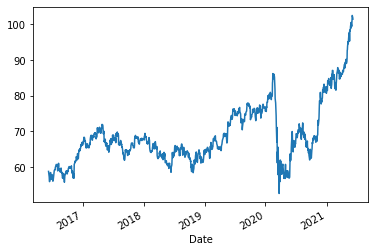

In [2]:
start = dt.date.today() - dt.timedelta(1825)
end = dt.date.today()

ohlcv = yf.download("cba.AX", start, end)
ohlcv["Adj Close"].plot()

<AxesSubplot:xlabel='Date'>

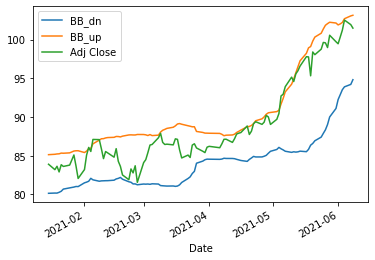

In [3]:
dftr = ohlcv.copy()

def ATR(DF, n):
    dftr = ohlcv.copy()
    dftr['H-L'] = abs(dftr['High'] - dftr['Low']) 
    dftr['H-PC'] = abs(dftr['High'] - dftr['Close'].shift(1))
    dftr['L-PC'] = abs(dftr['Low'] - dftr['Close'].shift(1)) 
    dftr['TR'] = dftr[['H-L', 'H-PC', 'L-PC']].max(axis=1, skipna=False)
    dftr['ATR'] = dftr['TR'].rolling(n).mean()
    dfATR = dftr['ATR']
    return dfATR
    
ATR(ohlcv, 20)

def BollingerBand(DF, n):
    dfBB = ohlcv.copy()
    dfBB["MA"] = dfBB['Adj Close'].rolling(n).mean()
    dfBB["BB_up"] = dfBB["MA"] + 2*dfBB["Adj Close"].rolling(n).std()
    dfBB["BB_dn"] = dfBB["MA"] - 2*dfBB["Adj Close"].rolling(n).std()
    return dfBB

BollingerBand(ohlcv, 20).iloc[-100:,[-1, -2, -5]].plot()

## MACD

[*********************100%***********************]  1 of 1 completed


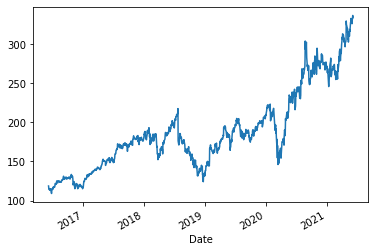

In [4]:
# import pandas_datareader.data as pdr

start = dt.date.today() - dt.timedelta(1825)
end = dt.date.today()

ohlcv = yf.download("fb", start, end)

ohlcv["Adj Close"].plot()

ma = ohlcv.copy()


In [42]:
def MACD(ma_df, x, y, z):
    ma["Fast"] = ohlcv["Adj Close"].ewm(span=x, min_periods=x).mean()
    ma["Slow"] = ohlcv["Adj Close"].ewm(span=y, min_periods=y).mean()
    ma["MACD"] = ma["Fast"] - ma["Slow"]
    ma["Signal"] = ma["MACD"].ewm(span=z, min_periods=z).mean()
    ma.dropna(inplace=True)
    return ma

<AxesSubplot:xlabel='Date'>

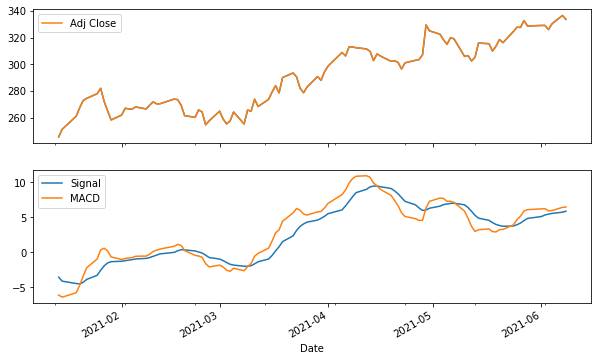

In [44]:
df_macd = MACD(ohlcv, 12, 26, 9)

f, (ax1, ax2) = plt.pyplot.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))
ax1.plot(MACD(ohlcv, 12, 26, 9).iloc[-100:,[-6]])

df_macd.iloc[-100:,[-6]].plot(ax=ax1)
df_macd.iloc[-100:,[-1,-2]].plot(ax=ax2)


## RSI

In [50]:
dfrsi = ohlcv.copy()

def RSI(DF, n):
    dfrsi['delta'] = dfrsi['Adj Close'] - dfrsi['Adj Close'].shift(1)
    dfrsi['gain'] = np.where(dfrsi['delta']>=0, dfrsi['delta'], 0)
    dfrsi['loss'] = np.where(dfrsi['delta']<0, abs(dfrsi['delta']), 0)
    avg_gain = [] 
    avg_loss = []
    gain = dfrsi['gain'].tolist()
    loss = dfrsi['loss'].tolist()
    for items in range(len(dfrsi)):
        if items < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif items == n:
            avg_gain.append(dfrsi['gain'].rolling(n).mean().tolist()[n]) 
            avg_loss.append(dfrsi['loss'].rolling(n).mean().tolist()[n])
        elif items > n:
            avg_gain.append(((n-1)*avg_gain[items-1] + gain[items])/n) 
            avg_loss.append(((n-1)*avg_loss[items-1] + loss[items])/n) 
    dfrsi['avg_loss'] = np.array(avg_loss)
    dfrsi['RSI'] = 100 - (100 / (1 + (dfrsi['avg_gain']/dfrsi['avg_loss'])))
    return dfrsi['RSI']

<AxesSubplot:xlabel='Date'>

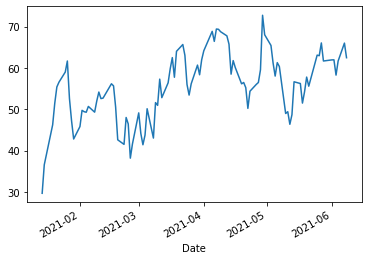

In [57]:
RSI(ohlcv, 14).iloc[-100:,].plot()